# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

We import required packages for our project.

We call in our model, HouseholdSpecializationModelClass, from our constructed py-file.

Moreover, we setup autoreload.

In [1]:
# Importing all required packages for our project
from types import SimpleNamespace

import numpy as np
from scipy import optimize
from scipy.optimize import minimize

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Importing the class from the .py file
from inauguralprojectpy import HouseholdSpecializationModelClass

# We call our model specifications
HHclass = HouseholdSpecializationModelClass()

# Question 1

For the first question we want to illustrate how the ratio for hours working at home between the male and the female changes, when alpha and sigma varies.

We achieve this by making a table to read the values of the ratio, when alpha and sigma varies.

Moreover, we create a 3D plot to illustrate the results in a plot.

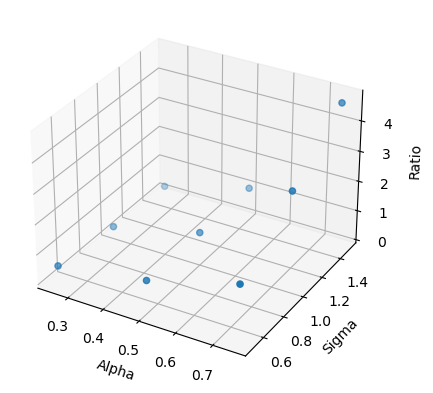

Alpha - Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


In [2]:
# Just want graphs and less clutter in terms of output
import warnings
warnings.filterwarnings("ignore")

# We define the parameters alpha and sigma
alpha_varying = [0.25, 0.5, 0.75]
sigma_varying = [0.5, 1, 1.5]

# We store the results that we get
alphastore = []
sigmastore = []
ratiostore = []

# We create a simple loop for all the different values that we want to examine
for alpha in alpha_varying:
    for sigma in sigma_varying:

     # We set the correct values for the parameters
        HHclass.par.alpha = alpha
        HHclass.par.sigma = sigma

        # We solve the model
        opt = HHclass.solve_discrete()

        # We start by defining our the ratio between HF and HM
        ratio = opt.HF / opt.HM

        # We store the results
        alphastore.append(alpha)
        sigmastore.append(sigma)
        ratiostore.append(ratio)

# Definings and plotting the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alphastore, sigmastore, ratiostore)
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('Ratio')
plt.show()

# We define a table function to print the table
def print_table():
    # We define an empty text string to enter a title later
    text = ''
    # Creating the top header of the table. Alpha is values downward and Sigma to the right.
    text += f'{"Alpha - Sigma":3s}'
    for j, sigma in enumerate(sigma_varying):
       HHclass.par.sigma = sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # creating a line shift 
    
    # Creating the body of the table
    for i, alpha in enumerate(alpha_varying):
        HHclass.par.alpha = alpha
        if i > 0:
            text += '\n' # creating a line shift
        text += f'{alpha:8.2f}    |' # creating the left header
        for j, sigma in enumerate(sigma_varying):
            HHclass.par.sigma=sigma
            opt = HHclass.solve_discrete()
            text += f'{opt.HF/opt.HM:7.2f}'
    
    # Printing table to illustrate the output 
    print(text)

print_table()

# Question 2

Explain your code and procedure

The results for out logratio (HF/HM) is 
 [0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


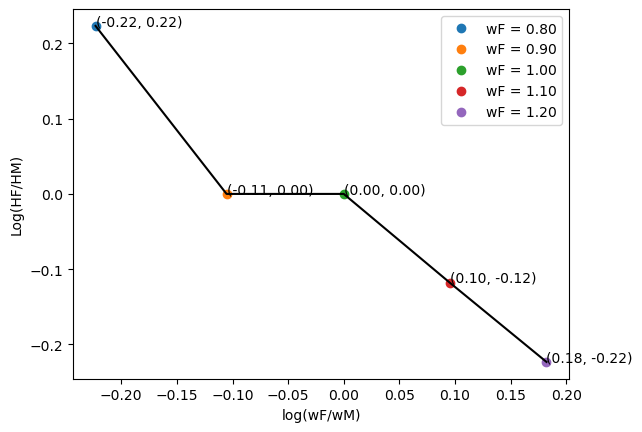

In [3]:
# Calling class
HHclass = HouseholdSpecializationModelClass()
# We define our vector wF
wF_varying = [0.8, 0.9, 1, 1.1, 1.2]

# Storing x and y corrdinates
x = []
y = []

#Creating a loop for the different values
for wF in wF_varying:
    HHclass.par.wF = wF

    # Solve
    opt2 = HHclass.solve_discrete()

    # Define the log function
    logratio = np.log(opt2.HF/opt2.HM)

    # Storing result for x and y coordinates
    x.append(np.log(wF/HHclass.par.wM))
    y.append(logratio)

    # Plotting
    plt.plot(np.log(wF/HHclass.par.wM), logratio, 'o', label=f'wF = {wF/HHclass.par.wM:.2f}')

# Customizing plot 
plt.plot(x, y, color='black',linestyle='-')
for i in range(5):
    plt.annotate(f'({x[i]:.2f}, {y[i]:.2f})', (x[i], y[i]))
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
print(f'The results for out logratio (HF/HM) is \n {y}')
plt.show()


# Question 3

Explain your code and procedure

The new results for out logratio, when the choice set is continuous 
 [0.2231532730184448, 0.10536826764744818, 5.896917626330302e-06, -0.09530861978103608, -0.18230738741155433]


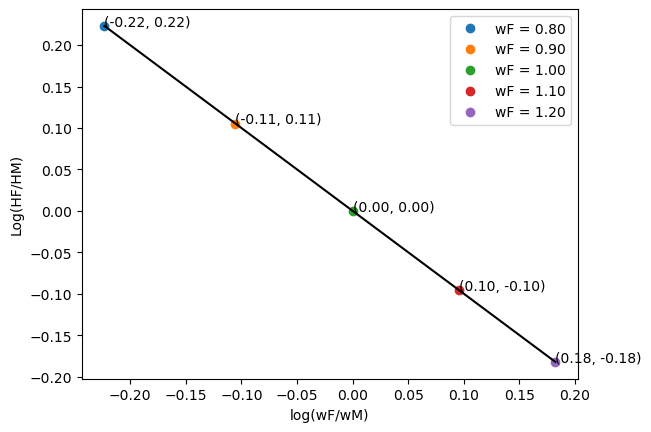

In [4]:
# Storing new the coordinates
x2 = []
y2 = []

# Looping over wF values
for wF in wF_varying:
    
    # Setting value 
    HHclass.par.wF = wF

    # Solving for discrete optimal choice
    sol = HHclass.solve_continuous()

    # Creating Ratio 
    logratio2 = np.log(sol.HF/sol.HM)

    # Storing result for x and y coordinates
    x2.append(np.log(wF/HHclass.par.wM))
    y2.append(logratio2)
    
    # Plotting 
    plt.plot(np.log(wF/HHclass.par.wM), logratio2, 'o', label=f'wF = {wF/HHclass.par.wM:.2f}')

# Customizing plot 
plt.plot(x2, y2, color='black',linestyle='-')
for i in range(5):
    plt.annotate(f'({x2[i]:.2f}, {y2[i]:.2f})', (x2[i], y2[i]))
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
print(f'The new results for out logratio, when the choice set is continuous \n {y2}')
plt.show()

# Question 4

Siminski and Yetsenga (2022) runs the regression and gets $\beta _0 \approx 0.4$ and  $\beta _1 \approx -0.1$.

Furthermore, we have fixed $w_M$ and $w_F$ is varying.

We set the values for beta similar to Siminski and Yetsenga and solve the model.

This gives us an estimate for alpha and for sigma such that: $(\beta_ 0 - \hat \beta _1) ^2 + (\beta _1 - \hat \beta _1)^2$ is minimized.

In [5]:
result = HHclass.estimate()
print(f'The squared error is minimized when:')
print(f' - alpha = {HHclass.par.alpha:.3f}')
print(f' - sigma = {HHclass.par.sigma:.3f}')
print()
print(f'At these values, our coefficients are:')
print(f' - beta_hat0 = {HHclass.sol.beta0:.3f}')
print(f' - beta_hat1 = {HHclass.sol.beta1:.3f}')
print()
print(f'The target values:')
print(f' - beta0 = {HHclass.par.beta0_target:.3f}')
print(f' - beta1 = {HHclass.par.beta1_target:.3f}')
print()

print('Therefore, the error must be 0:')
print(f'The minimized squared error is: {result.fun:.8f}')

The squared error is minimized when:
 - alpha = 0.982
 - sigma = 0.100

At these values, our coefficients are:
 - beta_hat0 = 0.400
 - beta_hat1 = -0.100

The target values:
 - beta0 = 0.400
 - beta1 = -0.100

Therefore, the error must be 0:
The minimized squared error is: 0.00000000


The estimated model with the with the optimized values can be visualized as:

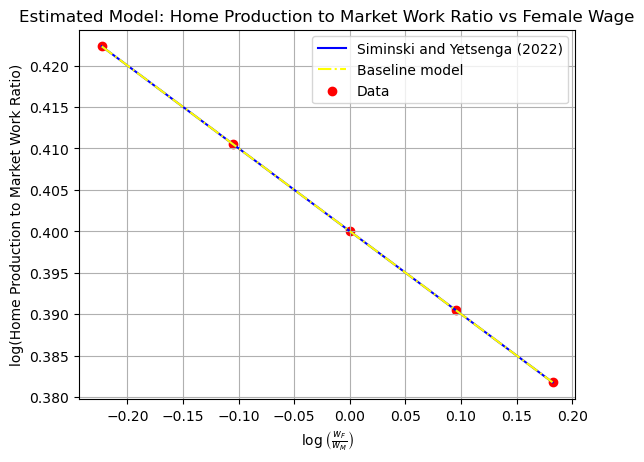

In [6]:
# Solving the model with the optimal values
HHclass.solve_wF_vec()

# Genereating the results from Siminski and Yetsenga (2022)
Sim_x = np.log(np.linspace(0.8, 1.2, 2))
Sim_y = HHclass.par.beta0_target + HHclass.par.beta1_target * Sim_x

# Setting up the plot
plt.plot(Sim_x, Sim_y, color='blue', linestyle='-', label='Siminski and Yetsenga (2022)')

# Calculate the predicted home production to market work ratio for each female wage value
wF_range_wM = np.linspace(0.8, 1.2, 100)  # Increase the number of points for a smoother plot
HF_HM_ratio = np.exp(HHclass.sol.beta0 + HHclass.sol.beta1 * np.log(wF_range_wM))

# Plot the baseline model
plt.plot(np.log(wF_range_wM), np.log(HF_HM_ratio), color='yellow', linestyle='-.', label='Baseline model')

# Plot the estimated model
plt.scatter(np.log(HHclass.par.wF_vec), np.log(HHclass.sol.HF_vec / HHclass.sol.HM_vec), color='red', label='Data')

plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel('log(Home Production to Market Work Ratio)') # RET DEN HER
plt.title('Estimated Model: Home Production to Market Work Ratio vs Female Wage')
plt.legend()
plt.grid(True)
plt.show()


# Question 5

We assume that men and women are equally productive in home and set $\alpha = 0.5$.

We start by running the regression, when only $\alpha$ is fixed to 0.5 and see what value for sigma minimizes: $(\beta_ 0 - \hat \beta _1) ^2 + (\beta _1 - \hat \beta _1)^2$.

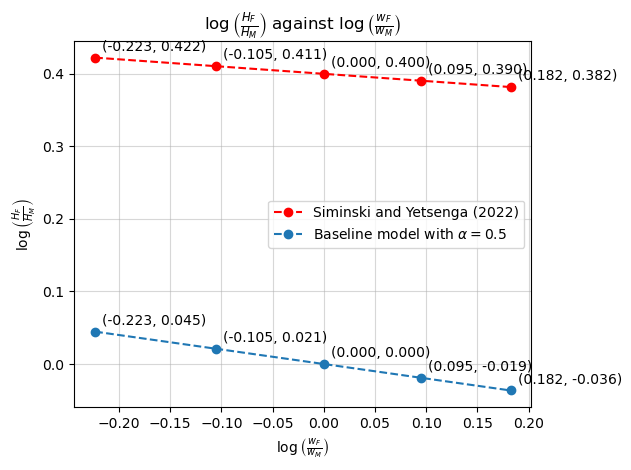

The error is minimized to 0.170, when alpha is 0.500 and sigma is 0.200.
This results in beta0 being equal to -0.000 and beta1 being equal -0.200.


In [7]:
# Ensuring baseline values
HHclass.par.alpha = 0.5
HHclass.par.sigma = 1.0

# Running the model
HHclass.estimate_extended(sigma=1.0,epsilon_F=1.0,extend=False)

# Solving model with new estimates
HHclass.solve_wF_vec()

# Storing obtained results
logHFHM_ratio_results = HHclass.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Genereating results from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 5))
y = HHclass.par.beta0_target + HHclass.par.beta1_target*x

plt.plot(x, y, marker= 'o', color='red', linestyle='--', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_results, marker='o', linestyle='--', label=r'Baseline model with $\alpha=0.5$')

# Legend
plt.legend(loc='best')

# Customizing the plot
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Creating annotations
for i in range(5):
    plt.annotate(f"({x[i]:.3f}, {y[i]:.3f})", (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

# Creating annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.3f}, {logHFHM_ratio_results[i]:.3f})", (logwFwM_ratio[i], logHFHM_ratio_results[i]), xytext=(5, 5), textcoords='offset points')

# Gridlines
plt.grid(True, linestyle='-', alpha=0.5)

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()

# Results
error1 = (HHclass.sol.beta0 - HHclass.par.beta0_target)**2 + (HHclass.sol.beta1 - HHclass.par.beta1_target)**2
print(f'The error is minimized to {error1:.3f}, when alpha is {HHclass.par.alpha:.3f} and sigma is {HHclass.par.sigma:.3f}.')
print(f'This results in beta0 being equal to {HHclass.sol.beta0:.3f} and beta1 being equal {HHclass.sol.beta1:.3f}.')

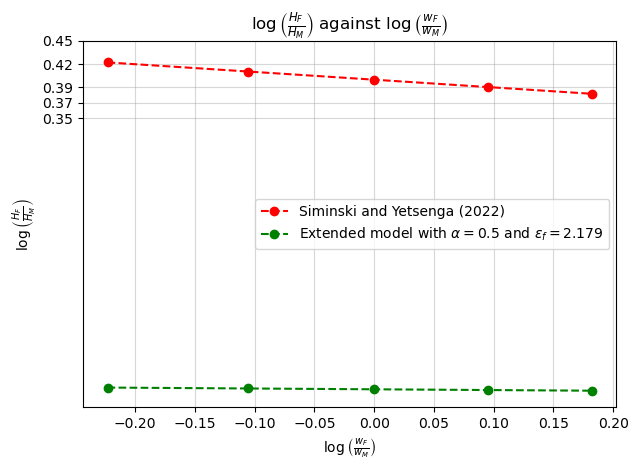

The error is minimized to 0.16810065, when alpha is 0.50000000 and sigma is 0.01000000.
This results in beta0 being equal -0.00000070 and beta1 being equal to -0.00999951.
In the baseline model, epsilon is 1 for both men and women. When we normalize epsilon_M to 1, we find that epsilon_F is 1.55006104.


In [11]:
# Ensuring baseline values
HHclass.par.alpha = 0.5
HHclass.par.sigma = 1.0
HHclass.par.epsilon_F = 1.0
HHclass.par.epsilon_M = 1.0

# Running the extended model
HHclass.estimate_extended(sigma=1.0,epsilon_M=1.0,epsilon_F=1.0,extend=True)

# Solving model with new estimates
HHclass.solve_wF_vec()

# Storing obtained results
logHFHM_ratio_results = HHclass.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# Genereating results from Siminski and Yetsenga (2022)
x = np.log(np.linspace(0.8, 1.2, 5))
y = HHclass.par.beta0_target + HHclass.par.beta1_target*x

plt.plot(x, y, marker= 'o', color='red', linestyle='--', label='Siminski and Yetsenga (2022)')
plt.plot(logwFwM_ratio, logHFHM_ratio_results, color='green', marker='o', linestyle='--', label=r'Extended model with $\alpha=0.5$ and $\epsilon_f=2.179$')

# Legend
plt.legend(loc='best')

# Customizing the plot
plt.title(r'$\log\left(\frac{H_F}{H_M}\right)$ against $\log\left(\frac{w_F}{w_M}\right)$')
plt.xlabel(r'$\log\left(\frac{w_F}{w_M}\right)$')
plt.ylabel(r'$\log\left(\frac{H_F}{H_M}\right)$')

# Gridlines
plt.grid(True, linestyle='-', alpha=0.5)

# Adjusting the layout
plt.tight_layout()

ytick_positions = [0.35, 0.37, 0.39, 0.42, 0.45]  # Example tick positions
ytick_labels = ['0.35', '0.37', '0.39', '0.42', '0.45']  # Example tick labels
plt.yticks(ytick_positions, ytick_labels)

# Display the plot
plt.show()

# Results
error2 = (HHclass.sol.beta0 - HHclass.par.beta0_target)**2 + (HHclass.sol.beta1 - HHclass.par.beta1_target)**2
print(f'The error is minimized to {error2:.8f}, when alpha is {HHclass.par.alpha:.8f} and sigma is {HHclass.par.sigma:.8f}.')
print(f'This results in beta0 being equal {HHclass.sol.beta0:.8f} and beta1 being equal to {HHclass.sol.beta1:.8f}.') 
print((f'In the baseline model, epsilon is 1 for both men and women. When we normalize epsilon_M to 1, we find that epsilon_F is {HHclass.par.epsilon_F:.8f}.'))